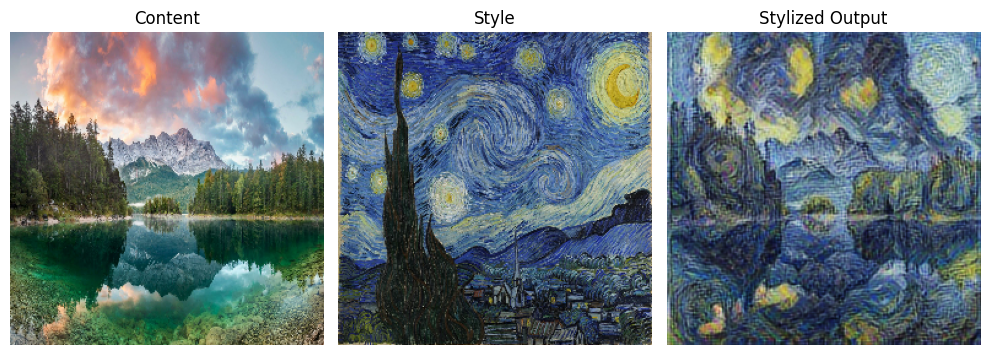

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Load pre-trained model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

def load_image(image_url):
    response = requests.get(image_url)
    img = tf.io.decode_image(response.content, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (256, 256))
    return img[tf.newaxis, :]

# Use your Google Drive image URLs
content_url = 'https://drive.google.com/uc?id=1ehb3WxXTLbIOv1cK3A2k_V7--3gYEB_0'
style_url = 'https://drive.google.com/uc?id=1evnlMJ2o0fc77lVDorljV9hNTQDrhbZt'

# Load images
content_image = load_image(content_url)
style_image = load_image(style_url)

# Run style transfer
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Show result
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Content")
plt.imshow(content_image[0])
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Style")
plt.imshow(style_image[0])
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Stylized Output")
plt.imshow(stylized_image[0])
plt.axis("off")

plt.tight_layout()
plt.show()